***1º: Setting the work environment up***

In [ ]:
!pip install fastf1

In [ ]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Setup plotting
plotting.setup_mpl()

# Set the cache directory (need a 'cache' folder) avoid long waiting times
ff1.Cache.enable_cache('/content/drive/MyDrive/F1/cache')

In [ ]:
# Session to be analyzed
session = ff1.get_session(2023, 'Japan', 'R')

In [ ]:
session.load()

***2º: Select the data***




In [ ]:
laps = session.laps

In [ ]:
# Here we change the drivers, we need 2 that were together in race (and in the 'stint' if we code it)
driver1 = 'SAI'
driver2 = 'HAM'
driver3 = 'RUS'

In [ ]:
# Get the laps info of the drivers (delete slow laps)
laps_driver1 = laps.pick_driver(driver1).pick_quicklaps()
laps_driver2 = laps.pick_driver(driver2).pick_quicklaps()
laps_driver3 = laps.pick_driver(driver3).pick_quicklaps()

In [ ]:
# Optional, or change stint... depends, but keep in mind that we need 2 drivers that were together in race
# If we only want to analyze stint 1 (until first pitstop) - pitstop can distort plots
laps_driver1 = laps_driver1.loc[laps_driver1['LapNumber'] >= 30]
laps_driver2 = laps_driver2.loc[laps_driver2['LapNumber'] >= 30]
laps_driver3 = laps_driver3.loc[laps_driver3['LapNumber'] >= 30]

***3º: Plot the analyzed data***

In [ ]:
driver1_color = ff1.plotting.team_color('Ferrari')
driver2_color = 'yellow'
driver3_color = ff1.plotting.team_color('Mercedes')

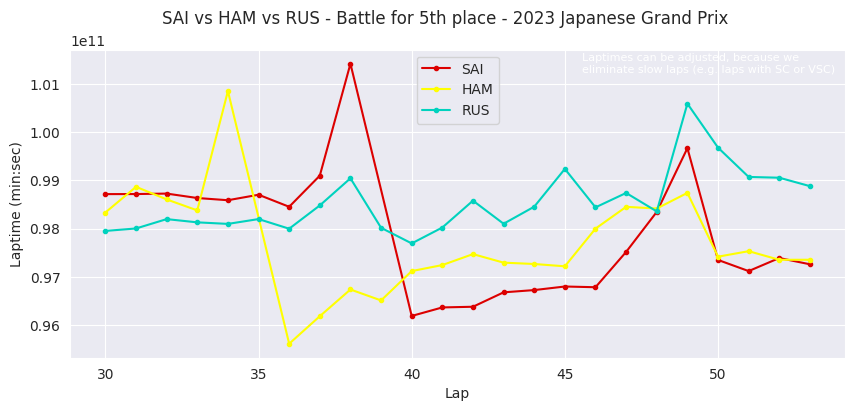

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle(f"{driver1} vs {driver2} vs {driver3} - Battle for 5th place - {session.event.year} {session.event.EventName}")
sns.set_style('darkgrid')

# Lap times (minutes) during the opening stint
ax.plot(laps_driver1['LapNumber'], laps_driver1['LapTime'], marker = ".", label=driver1, color=driver1_color)
ax.plot(laps_driver2['LapNumber'], laps_driver2['LapTime'], marker = ".", label=driver2, color=driver2_color)
ax.plot(laps_driver3['LapNumber'], laps_driver3['LapTime'], marker = ".", label=driver3, color=driver3_color)

plt.text(0.66, 0.92, "Laptimes can be adjusted, because we \neliminate slow laps (e.g. laps with SC or VSC)",
         transform=ax.transAxes, fontsize=8, color='white', ha='left', va='bottom')

#plt.xticks(np.arange(laps_driver1['LapNumber'].min(), laps_driver1['LapNumber'].count() + 1, step=2))
ax.set(ylabel='Laptime (min:sec)', xlabel='Lap')
ax.legend(loc="upper center")

#plt.savefig(f"/content/drive/MyDrive/F1/16. Japon (Suzuka) 23/Fotos/sai_ham_rus_laps.png", dpi=500)

plt.show()